# Decode `.fit` data
Play around and try to decode `.fit` data from Garmin devices. Following instructions taken from [here](https://www.deuxpi.ca/blog/activity-tracking-files.html)

In [77]:
import fitparse
import sys
import matplotlib.pyplot as plt

In [32]:
def getUniqueValues(lst):
    return list( set(lst) )

In [48]:
input_file = '/Users/francesco/PersonalProjects/data/garmin/2019-05-01/33802246536.fit'
fitfile = fitparse.FitFile(input_file, data_processor=fitparse.StandardUnitsDataProcessor())

In [49]:
type(fit_file)

fitparse.base.FitFile

In [65]:
data_type = []
data_name = []

for record in fitfile.get_messages():
    
    if record.type == 'data':
        data_type.append(record.type)
        data_name.append(record.name)
    
    if record.type == 'data':
        if not record.name == 'monitoring': continue
        print(record.name)
        
        for field_data in record:
            print(' * {}: {}'.format(field_data.name, field_data.value))

monitoring
 * timestamp: 2019-04-30 22:00:00
 * unknown_35: 0
 * unknown_36: 0
monitoring
 * timestamp: 2019-04-30 22:00:00
 * unknown_37: 0
 * unknown_38: 0
monitoring
 * activity_type: sedentary
 * current_activity_type_intensity: (8,)
 * intensity: 0
 * timestamp: 2019-04-30 22:00:00
monitoring
 * heart_rate: 72
 * timestamp_16: 31132
monitoring
 * heart_rate: 76
 * timestamp_16: 31192
monitoring
 * heart_rate: 74
 * timestamp_16: 31252
monitoring
 * heart_rate: 72
 * timestamp_16: 31312
monitoring
 * heart_rate: 82
 * timestamp_16: 31432
monitoring
 * activity_type: sedentary
 * current_activity_type_intensity: (104,)
 * intensity: 3
 * timestamp: 2019-04-30 22:06:00
monitoring
 * heart_rate: 72
 * timestamp_16: 31492
monitoring
 * activity_type: sedentary
 * current_activity_type_intensity: (8,)
 * intensity: 0
 * timestamp: 2019-04-30 22:07:00
monitoring
 * heart_rate: 71
 * timestamp_16: 31552
monitoring
 * activity_type: sedentary
 * current_activity_type_intensity: (72,)
 * in

In [37]:
print('records can be of {} type(s):'.format( len(getUniqueValues(data_type_unique)) ), getUniqueValues(data_type_unique))
print('data names are:', getUniqueValues(data_name))

records can be of 1 type(s): ['data']
data names are: ['monitoring', 'event', 'file_id', 'device_info', 'ohr_settings', 'software', 'unknown_211', 'monitoring_info', 'unknown_233', 'unknown_24', 'stress_level']


In [71]:
HR_list = []
for record in fit_file.get_messages('monitoring'):
    #print(record.as_dict())
    
    this_record = record.as_dict()
    
    for field in this_record['fields']:
        if 'heart_rate' in field['name']:
            HR_list.append(this_record)

In [72]:
len(HR_list)

425

Example HR record looks like this:
```
{'name': 'monitoring',
  'fields': [{'name': 'timestamp_16',
    'def_num': 26,
    'base_type': 'uint16',
    'type': 'uint16',
    'units': 's',
    'value': 31132,
    'raw_value': 31132},
   {'name': 'heart_rate',
    'def_num': 27,
    'base_type': 'uint8',
    'type': 'uint8',
    'units': 'bpm',
    'value': 72,
    'raw_value': 72}]}
```

In [76]:
HR_timestamp = []
HR_value = []
for entry in HR_list:
    HR_timestamp.append( entry['fields'][0]['value'] )
    HR_value.append( entry['fields'][1]['value'] )

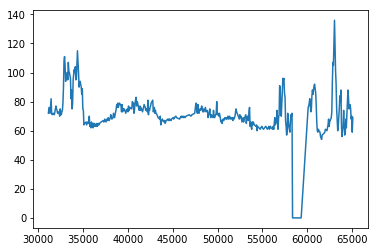

In [78]:
plt.figure()
plt.plot(HR_timestamp, HR_value)